# Домашнее задание. Урок 5. RNN
## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Импорт библиотек

In [ ]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<a id="41"></a>
### Загрузка данных

In [2]:
data = pd.read_csv('airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


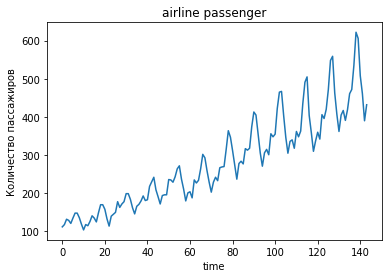

In [17]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Количество пассажиров")
plt.title("airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data

In [4]:
#reshape
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [5]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [8]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(142, 1),y:(142,)
X_train:(95, 1),y_train:(95,),X_test:(47, 1),y_test(47,)


In [9]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(95, 1),y_train:(95, 1),X_test:(47, 1),y_test(47, 1)


In [10]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


<a id="43"></a>
### Create LSTM Model

In [11]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
95/95 [==============================] - 1s 1ms/step - loss: 0.0437
Epoch 2/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 3/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 4/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 5/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 6/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 7/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 8/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 9/50
95/95 [==============================] - 0s 986us/step - loss: 0.0105
Epoch 10/50
95/95 [==============================] - 0s 985us/step - loss: 0.0095
Epoch 11/50
95/95 [==============================] - 0s 959us/step - loss: 0.0086
Epoch 12/50
95/95 [==============================] - 0s 928us/step - loss: 0.0076
Epoch 13/50
95/95 [======================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [12]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


(95, 1, 1)
(95, 1)
(47, 1, 1)
(47, 1)


In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [15]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.05 RMSE
Test Score: 47.02 RMSE


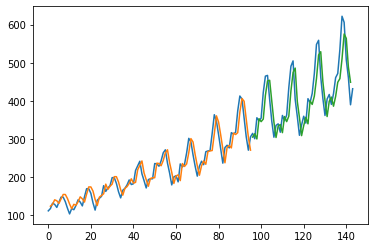

In [16]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [212]:
test1=numpy.reshape(test1,(len(test1),1,1))
y_pred=model.predict(test1)
y_pred=scaler.fit_transform(y_pred)
test=scaler.fit_transform(test)

In [216]:
test1

array([[[0.24131274]],

       [[0.1911197 ]],

       [[0.24131274]],

       [[0.26640925]],

       [[0.24903473]],

       [[0.31467178]],

       [[0.3185328 ]],

       [[0.32046333]],

       [[0.4073359 ]],

       [[0.5019305 ]],

       [[0.46911195]],

       [[0.40154442]],

       [[0.32818535]],

       [[0.25675675]],

       [[0.3359073 ]],

       [[0.34749034]],

       [[0.33397684]],

       [[0.41119692]],

       [[0.4034749 ]],

       [[0.4131274 ]],

       [[0.52123547]],

       [[0.5965251 ]],

       [[0.58108103]],

       [[0.484556  ]],

       [[0.3899614 ]],

       [[0.3223938 ]],

       [[0.3899614 ]],

       [[0.4073359 ]],

       [[0.3803089 ]],

       [[0.48648646]],

       [[0.47104248]],

       [[0.484556  ]],

       [[0.6138996 ]],

       [[0.6969112 ]],

       [[0.70077217]],

       [[0.57915056]],

       [[0.46911195]],

       [[0.38803086]],

       [[0.44787642]],

       [[0.45559844]],

       [[0.4131274 ]],

       [[0.49806

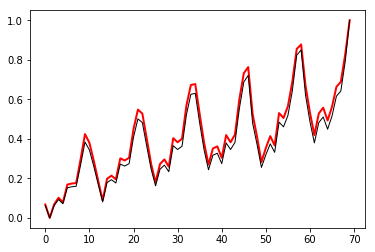

In [214]:
plt.plot(y_pred,color="red",linewidth=2)
plt.plot(test,color="black",linewidth=1)
plt.show()